# Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Importing Dataset

In [4]:
df = pd.read_csv('E:/clean_resume_data.csv')

In [5]:
df.head()

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...


In [7]:
df.shape

(2484, 3)

# Exploratory Data Analysis

In [8]:
df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

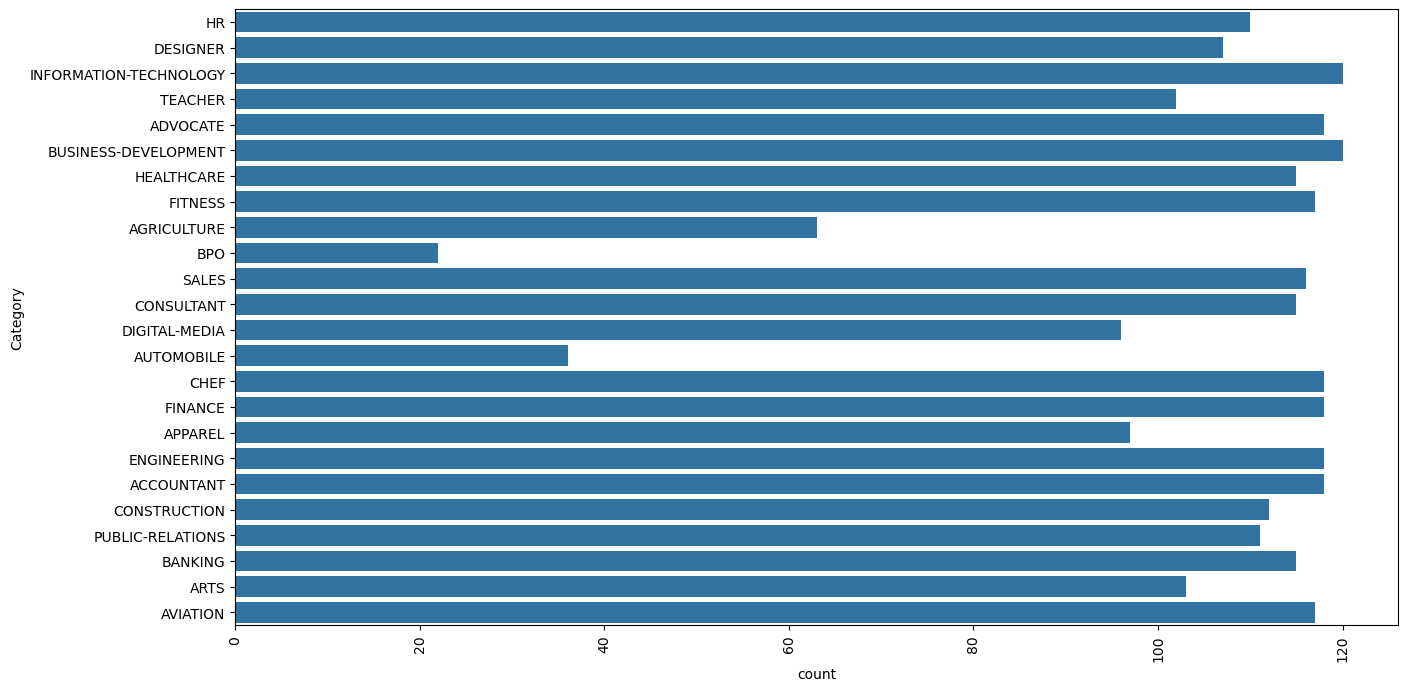

In [6]:
plt.figure(figsize=(15,8))
sns.countplot(y='Category',data=df)
plt.xticks(rotation=90)
plt.show()

In [7]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()

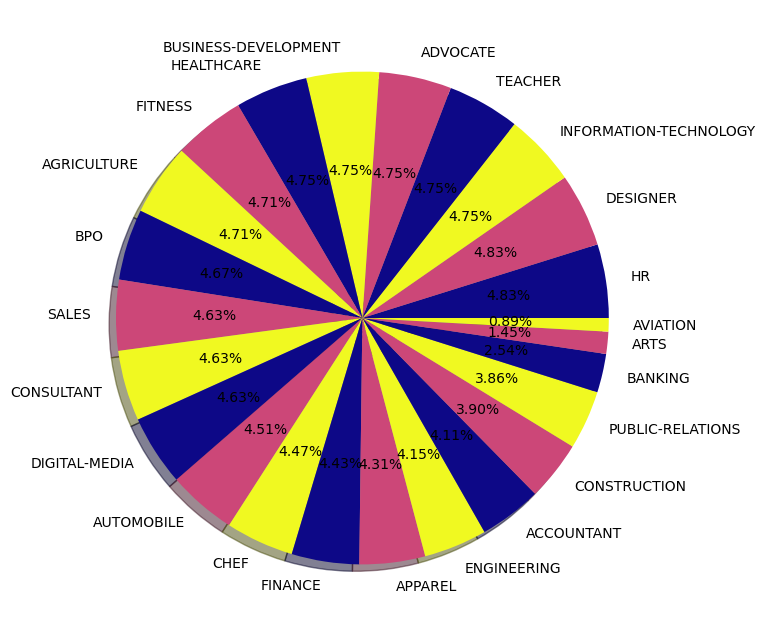

In [8]:
plt.figure(figsize=(15,8))
plt.pie(counts,labels=labels,autopct='%1.2f%%',shadow=True,colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

# Balancing the Dataset

In [9]:
df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [12]:
# SMOTE can also be used for resampling
from sklearn.utils import resample

max_num = df['Category'].value_counts().max()

balanced_data = []
for category in df['Category'].unique():
    category_data = df[df['Category'] == category]
    if len(category_data) < max_num:
        balanced_category_data = resample(category_data,replace=True,n_samples=max_num,random_state=42)
    else:
        balanced_category_data = resample(category_data, replace=False,n_samples=max_num,random_state=42)
    balanced_data.append(balanced_category_data)
balanced_df = pd.concat(balanced_data)

In [13]:
balanced_df['Category'].value_counts()

Category
HR                        120
DESIGNER                  120
ARTS                      120
BANKING                   120
PUBLIC-RELATIONS          120
CONSTRUCTION              120
ACCOUNTANT                120
ENGINEERING               120
APPAREL                   120
FINANCE                   120
CHEF                      120
AUTOMOBILE                120
DIGITAL-MEDIA             120
CONSULTANT                120
SALES                     120
BPO                       120
AGRICULTURE               120
FITNESS                   120
HEALTHCARE                120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  120
TEACHER                   120
INFORMATION-TECHNOLOGY    120
AVIATION                  120
Name: count, dtype: int64

In [14]:
balanced_df.isnull().sum()

ID          0
Category    0
Feature     1
dtype: int64

In [15]:
balanced_df.dropna(inplace=True)

# Train-Test Split

In [16]:
X = balanced_df['Feature']
y = balanced_df['Category']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Encoding (TF-IDF)

In [17]:
vect = TfidfVectorizer()
X_train_vectorized = vect.fit_transform(X_train)
X_test_vectorized = vect.transform(X_test)

# Training Random Forest Classifier

In [18]:
model = RandomForestClassifier()

In [19]:
model.fit(X_train_vectorized,y_train)

RandomForestClassifier()

In [20]:
model.score(X_test_vectorized,y_test)

0.8350694444444444

In [21]:
prediction = model.predict(X_test_vectorized)

In [22]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.8350694444444444


In [23]:
from sklearn.svm import SVC

In [24]:
svc = SVC()

In [25]:
svc.fit(X_train_vectorized,y_train)

SVC()

In [26]:
svc.score(X_test_vectorized,y_test)

0.8454861111111112

In [27]:
prediction1 = svc.predict(X_test_vectorized)

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test,prediction1))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.91      0.95      0.93        21
              ADVOCATE       0.87      0.69      0.77        29
           AGRICULTURE       0.83      0.83      0.83        23
               APPAREL       0.75      0.86      0.80        21
                  ARTS       0.74      0.77      0.76        22
            AUTOMOBILE       1.00      1.00      1.00        19
              AVIATION       0.87      0.90      0.89        30
               BANKING       1.00      0.78      0.88        23
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.42      0.83      0.56        18
                  CHEF       0.96      0.96      0.96        28
          CONSTRUCTION       0.96      1.00      0.98        25
            CONSULTANT       1.00      0.58      0.73        31
              DESIGNER       1.00      0.82      0.90        28
         DIGITAL-MEDIA       0.89      

In [30]:
accuracy_svm = accuracy_score(y_test, prediction1)

In [31]:
accuracy_svm

0.8454861111111112

In [32]:
cmatrix = confusion_matrix(y_test, prediction1)

In [33]:
cmatrix

array([[20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  1,  0,  3,  0],
       [ 0,  0, 19,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  1,  0,  0,  0],
       [ 0,  0,  0, 18,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 17,  0,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  1,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 19,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0, 27,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0, 18,  0,  1,  0,  0,  0,  0,  0,  0,
         2,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, 

<Axes: >

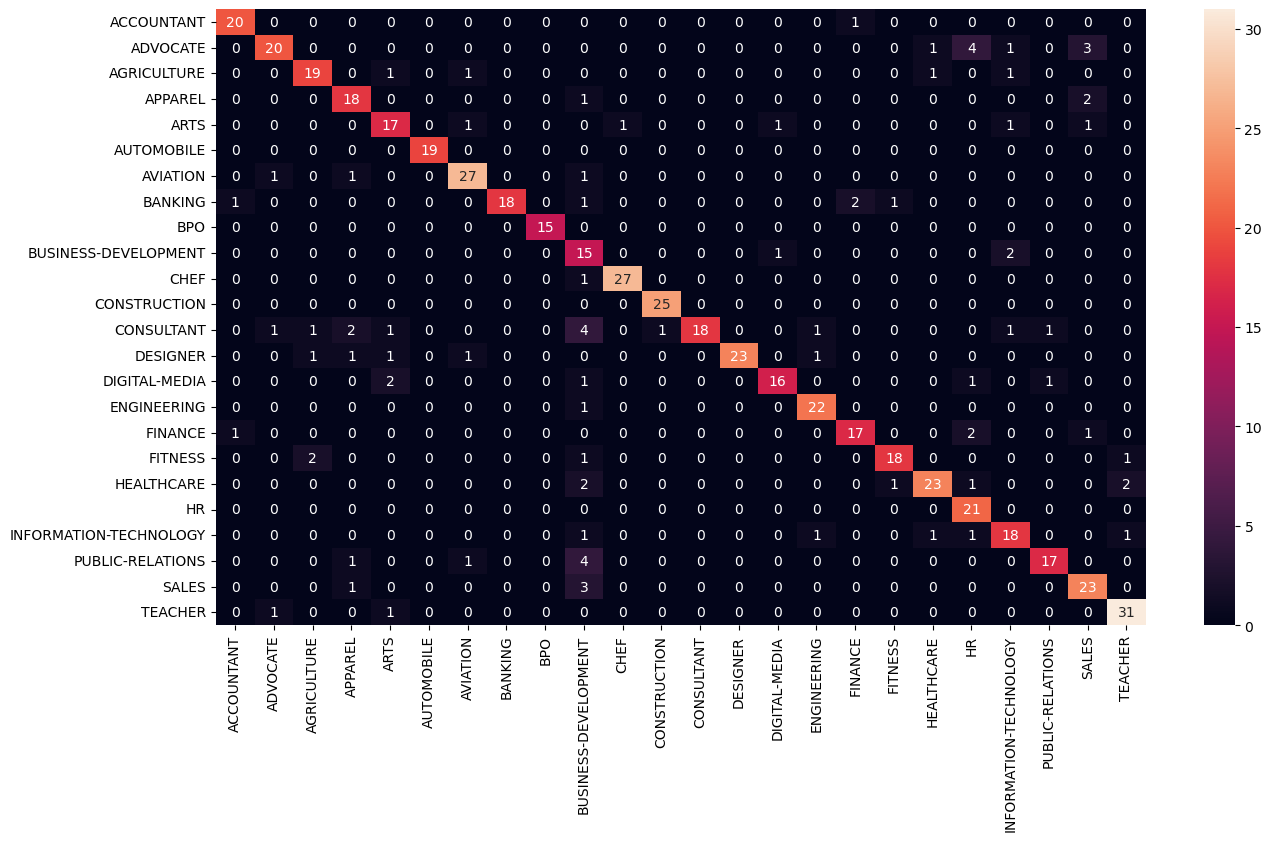

In [34]:
plt.figure(figsize=(15,8))
sns.heatmap(cmatrix, annot=True,xticklabels=model.classes_,yticklabels=model.classes_)

# Predictive System

In [37]:
import re
def cleanText(txt):
    cleanedText = re.sub(r'http\S+\s', ' ',txt)
    cleanedText = re.sub(r'RT|cc', ' ',cleanedText)
    cleanedText = re.sub(r'#\S+\s', ' ',cleanedText)
    cleanedText = re.sub(r'@\S+', ' ',cleanedText)
    cleanedText = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\\]^_'{|}~"""), ' ', cleanedText)
    cleanedText = re.sub(r'[^\x00-\x7f]', ' ',cleanedText)
    cleanedText = re.sub(r'\s+', ' ',cleanedText)    
    return cleanedText

In [44]:
def p_redict(text):
    cleaned_text = cleanText(text)
    text_vector = vect.transform([cleaned_text])
    predicted = model.predict(text_vector)[0]
    return predicted

In [45]:
resume = "cad designer summary personable cad designer drafter communicates openly effectively involved construction site workers company ceos successfully sees projects initial planning stages completion highly skilled broad expertise successful anticipating future issues implementing creative solutions highlights land development planning erosion sedimentation control technical plan execution civil autocad specialist water piping design complex problem solver advanced critical thinking strong decision maker map creation software topographic studies surveying local municipality projects land use approval process construction surveying permit applications inland empire regional knowledge highly accurate independent worker experience cad designer company name city state prepared standard engineering computations surveys designs produced issued precise technical specifications data sheets controlled budget established company efficiency policies maximize profits surveyed project sites establish reference points guide construction monitor construction site progress managed issues arose cad designer company name city state prepared standard engineering computations surveys designs produced issued precise technical specifications data sheets controlled budget established company efficiency policies maximize profits survey tech company name city state prepared standard engineering computations surveys designs produced issued precise technical specifications data sheets controlled budget established company efficiency policies maximize profits surveyed project sites establish reference points guide construction monitor construction site progress managed issues arose cad designer company name city state prepared standard engineering computations surveys designs produced issued precise technical specifications data sheets advised project manager regarding construction material costs quantity calculations implemented complex design software drawing tools plan design transportation hydraulic systems cad drafter company name city state drafted detailed drawings structures specifying dimensions materials needed reported status design process cost analysis project manager collaborated builders see construction line drawings designs marketing rep company name city state interviewed prospective clients learn financial needs discuss existing coverage processed applications payments corrections endorsements cancellations called warm leads week expand client base promoted agency products customers person telephone writing prepared necessary paperwork process insurance sales renewals marketing rep company name city state interviewed prospective clients learn financial needs discuss existing coverage processed applications payments corrections endorsements cancellations called warm leads week expand client base promoted agency products customers person telephone writing marketing rep company name city state promoted agency products customers person telephone writing processed applications payments corrections endorsements cancellations interviewed prospective clients learn financial needs discuss existing coverage marketing rep company name city state interviewed prospective clients learn financial needs discuss existing coverage processed applications payments corrections endorsements cancellations called warm leads week expand client base department supervisor company name city state delivered excellent customer service greeting assisting customer addressed customer inquiries resolved complaints stocked restocked inventory shipments received reorganized sales floor meet company demands directed supervised employees engaged sales inventory taking reconciling cash receipts determined staff promotions demotions terminated employees necessary fulfilled customer shipping needs using ups usps methods completed weekly schedules according payroll policies maintained daily record transactions worked closely district manager formulate build store brand contributed merchandising ideas team sale meetings cad designer company name city state prepared standard engineering computations surveys designs produced issued precise technical specifications data sheets controlled budget established company efficiency policies maximize profits surveyed project sites establish reference points guide construction monitor construction site progress managed issues arose education high school diploma general education canyon springs high school city state usa academic achievement art captain basketball team art mt san jacinto community college city state usa skills civil autocad civil engineering drafting office skills coaching customer service documentation leadership marketing problem solving relationship building starter sorting troubleshooting"
predicted_category = p_redict(resume)
print('Predicted Category: ',predicted_category)

Predicted Category:  DESIGNER


# Saving the Model

In [46]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(vect,open('vect.pkl','wb'))